In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('2018_Incident_Report.csv')

seed = 135

In [2]:
df.head()
df.info()
#df['Incident Occurred'] = df['Incident Occurred'].astype('datetime64')
#df['Incident Reported'] = df['Incident Reported'].astype('datetime64')
#df['Incident_Time_Lapse'] = (df['Incident Reported']-df['Incident Occurred'])
#df['Incident_Time_Lapse'] / np.timedelta64(1, 'm')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85555 entries, 0 to 85554
Data columns (total 31 columns):
Primary Key                    85555 non-null object
Incident Number                85555 non-null int64
Report Type                    85555 non-null object
Report Type Description        81969 non-null object
Incident Status Code           85555 non-null object
Incident Status Description    85555 non-null object
Investigation Status           85555 non-null object
Incident Occurred              85555 non-null object
Incident Reported              85555 non-null object
Incident Location              85269 non-null object
Zip Code                       45823 non-null float64
RPA                            44458 non-null float64
Zone                           44458 non-null float64
Location Code                  85555 non-null int64
Location Description           85555 non-null object
Offense Number                 85543 non-null float64
Offense NIBRS                  85539 non-

In [3]:
#df['Incident_Time_Lapse'].head()
#df.groupby('Victim Race').nunique()


In [4]:
df = df[np.isfinite(df['Latitude'])]
df = df[np.isfinite(df['Longitude'])]

rows = len(df.index)
round_rows = round(rows*.25)
print('Total observations: ',rows)
print('Fraction of observations tested: ',round_rows)
df = df.sample(frac=1)

df_sm = df[:round_rows]
#df_sm

Total observations:  84237
Fraction of observations tested:  21059


In [5]:
array = df_sm[['Latitude', 'Longitude']].values

In [6]:
print(array)

[[ 36.15  -86.8  ]
 [ 36.07  -86.63 ]
 [ 36.115 -86.735]
 ...
 [ 36.22  -86.59 ]
 [ 36.103 -86.604]
 [ 36.082 -86.727]]


In [7]:
from sklearn.cluster import SpectralClustering
from sklearn import cluster

clustering = SpectralClustering(n_clusters = 3, assign_labels = "discretize",
                                random_state = seed).fit(array)

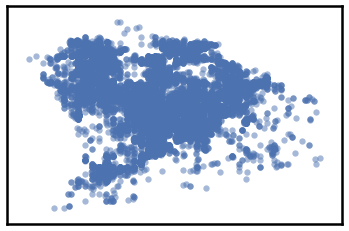

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np


%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 40, 'linewidths':0}

data = array
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [9]:
def plot_clusters(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)))

In [10]:
KMeans_Centroids = cluster.KMeans().fit_predict(data)

X = array
y = KMeans_Centroids
clf = NearestCentroid(metric = 'manhattan')
clf.fit(X,y)

cent = clf.centroids_
print(cent)

[[ 36.22  -86.768]
 [ 36.06  -86.64 ]
 [ 36.261 -86.7  ]
 [ 36.165 -86.817]
 [ 36.172 -86.621]
 [ 36.16  -86.77 ]
 [ 36.08  -86.717]
 [ 36.09  -86.92 ]]


In [11]:
sp_cent = np.hsplit(cent, 2)
print(sp_cent)

res = cent.reshape(8,2)
print(res)

[array([[36.22 ],
       [36.06 ],
       [36.261],
       [36.165],
       [36.172],
       [36.16 ],
       [36.08 ],
       [36.09 ]]), array([[-86.768],
       [-86.64 ],
       [-86.7  ],
       [-86.817],
       [-86.621],
       [-86.77 ],
       [-86.717],
       [-86.92 ]])]
[[ 36.22  -86.768]
 [ 36.06  -86.64 ]
 [ 36.261 -86.7  ]
 [ 36.165 -86.817]
 [ 36.172 -86.621]
 [ 36.16  -86.77 ]
 [ 36.08  -86.717]
 [ 36.09  -86.92 ]]


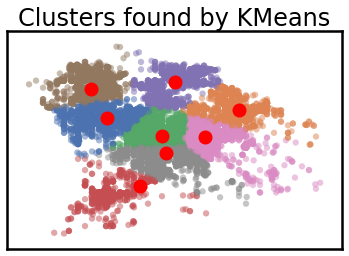

In [12]:
%matplotlib inline
p = plot_clusters(data, cluster.KMeans, (), {'n_clusters':8})
a = 36.1785,36.16,36.059,36.2695,36.221,36.129,36.165,36.081
b = -86.623,-86.7675,-86.6435,-86.7,-86.77,-86.9025,-86.813,-86.72
plt.scatter(a,b, c='red')
plt.show()

In [13]:
#plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':8})

In [14]:
#Spectral_Centroids = cluster.SpectralClustering().fit_predict(data)

#X = array
#y = Spectral_Centroids
#clf = NearestCentroid()
#clf.fit(X,y)

#print(clf.centroids_)